In [2]:
#from daly_comorbity.interfaces.data_interactor import DataInteractor
import numpy as np
import pandas as pd
import sqlalchemy
# Import date and timedelta class

#import warnings
import warnings
warnings.filterwarnings('ignore')
import os
import collections


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.style as style
import matplotlib.patches as mpatches

#time packages
import datetime as dt
import networkx as nx

In [3]:
def add_in_dict_ds_dw(row):
    try:
        ds_dict[row['member_internal_code']] = {
            **ds_dict[row['member_internal_code']],
            **{
                row['cid_alice_cat']: row['total_dw']
            }
        }
    except:
        ds_dict[row['member_internal_code']] = {row['cid_alice_cat']: row['total_dw']}

def add_in_dict_ds_count(row):
    try:
        ds_dict[row['member_internal_code']] = {
            **ds_dict[row['member_internal_code']],
            **{
                row['cid_alice_cat']: 1
            }
        }       
    except:
        ds_dict[row['member_internal_code']] = {row['cid_alice_cat']: 1}

In [4]:
df = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/data/external/cid_agregadas_.csv')
df2 = df
df3 = df

In [5]:
ds_dict = collections.defaultdict()
df.apply(lambda row: add_in_dict_ds_dw(row), axis=1)
df_ds_dw_row = pd.DataFrame.from_dict( ds_dict, orient='index').reset_index(drop=False).rename(columns={'index': 'member_internal_code'})
###############
ds_dict = collections.defaultdict()
df2.apply(lambda row: add_in_dict_ds_count(row), axis=1)
df_ds_count_row = pd.DataFrame.from_dict( ds_dict, orient='index').reset_index(drop=False).rename(columns={'index': 'member_internal_code'})



In [6]:
df_ds_dw_row.fillna(0, inplace=True)
df_ds_count_row.fillna(0, inplace=True)
#df_ds_dw_row['total_member_dw'] = df_ds_dw_row.drop(columns=['member_internal_code']).sum(axis=1)
df_ds_dw_row.set_index('member_internal_code', inplace=True)


Calculate total counts (prevalence)


In [7]:
df_ds_count_row.set_index('member_internal_code', inplace=True)
df_prevalence_links = df_ds_count_row.T.dot(df_ds_count_row)

In [8]:
df_prevalence_links.head()

,Transtorno Afetivo Bipolar,Transtornos Ansiosos,Transtornos da refração e da acomodação,Distúrbios de lípides,Fatores de risco,Nutricional,Rinites e sinusites,Infecção viral aguda,Hipertensão,Obesidade,...,"Menstruação excessiva, freqüente e irregular",Dor não classificada em outra parte,Transtornos de condução cardíaca,Verrugas,Outras doenças do intestino,Síncope e colapso,Transtornos Obsessivos-compulsivos,Transtornos fibroblásticos,Outros transtornos do ouvido,Outras doenças da mama
Transtorno Afetivo Bipolar,293.0,91.0,82.0,18.0,27.0,23.0,17.0,5.0,3.0,44.0,...,2.0,3.0,0.0,0.0,1.0,2.0,2.0,0.0,3.0,0.0
Transtornos Ansiosos,91.0,3562.0,1117.0,196.0,172.0,337.0,231.0,37.0,48.0,403.0,...,16.0,12.0,15.0,10.0,5.0,9.0,15.0,15.0,9.0,8.0
Transtornos da refração e da acomodação,82.0,1117.0,2761.0,169.0,102.0,304.0,183.0,21.0,26.0,298.0,...,10.0,8.0,16.0,6.0,7.0,5.0,8.0,12.0,7.0,9.0
Distúrbios de lípides,18.0,196.0,169.0,590.0,29.0,114.0,46.0,6.0,32.0,159.0,...,5.0,0.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0
Fatores de risco,27.0,172.0,102.0,29.0,428.0,31.0,31.0,5.0,9.0,56.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0


In [9]:
G = nx.from_numpy_matrix(df_prevalence_links.values, parallel_edges= False, create_using=nx.Graph())

#using numpy, we need the labels to be reset
label_mapping=dict(zip(range(len(df_prevalence_links.columns)), df_prevalence_links.columns))
G = nx.relabel_nodes(G, label_mapping)
G.remove_edges_from(nx.selfloop_edges(G))

widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()
nodes_weights = df_ds_dw_row.sum().values
pos = nx.kamada_kawai_layout(G, scale = 2)
colors = range(len(widths.values()))

In [10]:
max_value = max(widths.values())
widths_list = [x/max_value for x in widths.values()]
#for key, value in widths.items():
#    widths[key] = value/max_value

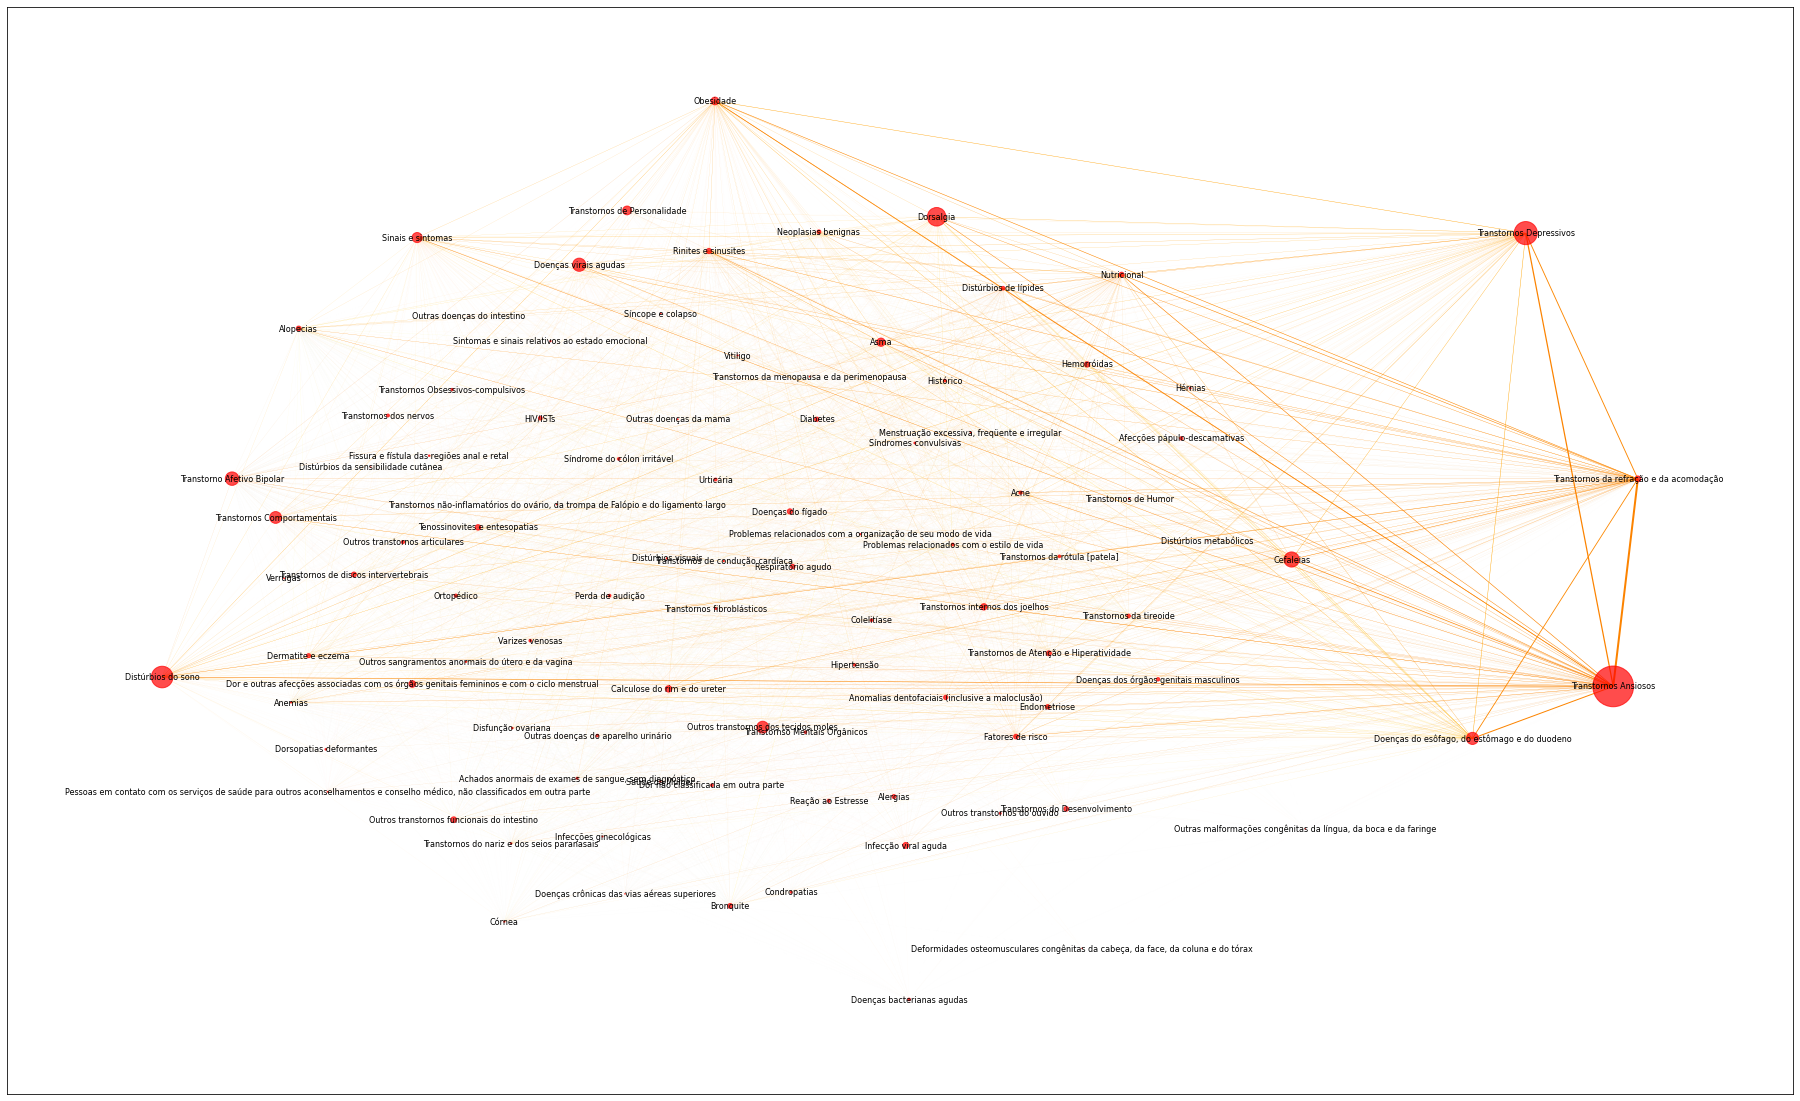

In [11]:
plt.figure(figsize=(32,20))

nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=nodes_weights*2,
                       node_color='red',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=[2*w for w in widths_list],
                       edge_color=colors,
                        edge_cmap= plt.cm.Wistia_r,
                       alpha=1)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_size = 8)
plt.box(True)
plt.savefig("comorbity_map.png", dpi = 300)
plt.show()


In [38]:
vec = df_prevalence_links[df_prevalence_links['Menstruação excessiva, freqüente e irregular']>0]['Menstruação excessiva, freqüente e irregular'].index.to_list()
vec.remove('Distúrbios do sono')
vec.remove('Transtornos da refração e da acomodação')
vec.remove('Transtornos Ansiosos')
vec.remove('Transtornos Depressivos')
H = G.subgraph(vec)

In [46]:
vec = df_prevalence_links[df_prevalence_links['Menstruação excessiva, freqüente e irregular']>0]['Menstruação excessiva, freqüente e irregular']
G = nx.from_numpy_matrix(vec, parallel_edges= False, create_using=nx.Graph())

#using numpy, we need the labels to be reset
label_mapping=dict(zip(range(len(vec.index)), vec.index))
G = nx.relabel_nodes(G, label_mapping)
G.remove_edges_from(nx.selfloop_edges(G))

widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()
nodes_weights = df_ds_dw_row.sum().values
pos = nx.kamada_kawai_layout(G, scale = 2)
colors = range(len(widths.values()))

NetworkXError: Input array must be 2D, not 1

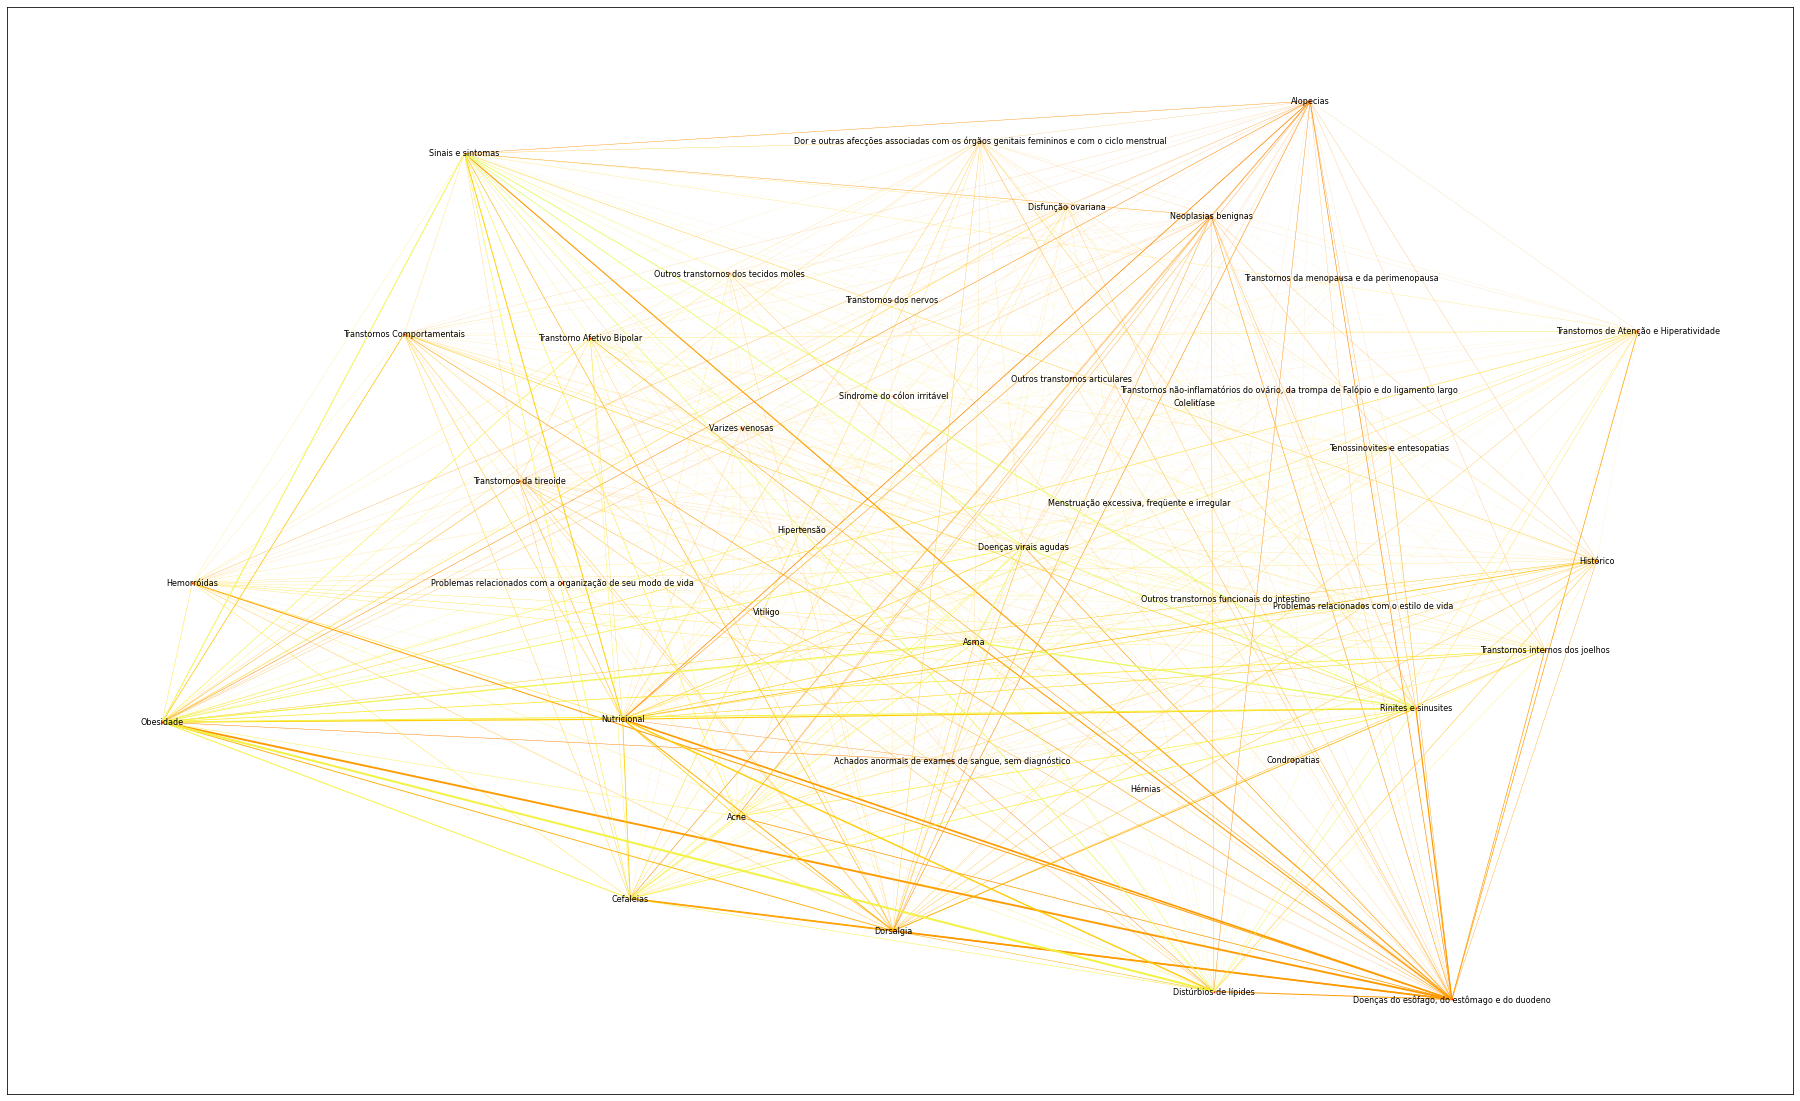

In [42]:

#using numpy, we need the labels to be reset
label_mapping=dict(zip(range(len(vec)), vec))
H = nx.relabel_nodes(H, label_mapping)

widths = nx.get_edge_attributes(H, 'weight')
nodelist = H.nodes()
pos = nx.kamada_kawai_layout(H, scale = 2)
colors = range(len(widths.values()))

max_value = max(widths.values())
widths_list = [x/max_value for x in widths.values()]
#for key, value in widths.items():
#    widths[key] = value/max_value

plt.figure(figsize=(32,20))

nx.draw_networkx_nodes(H,pos,
                       nodelist=nodelist,
                       node_size=1,
                       node_color='red',
                       alpha=0.7)
nx.draw_networkx_edges(H,pos,
                       edgelist = widths.keys(),
                       width=[2*w for w in widths_list],
                       edge_color=colors,
                        edge_cmap= plt.cm.Wistia_r,
                       alpha=1)
nx.draw_networkx_labels(H, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black', font_size = 8)
plt.box(True)
#plt.savefig("comorbity_map.png", dpi = 300)
plt.show()

In [41]:
range(vec)

TypeError: 'list' object cannot be interpreted as an integer

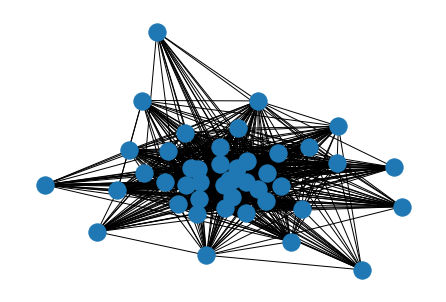

In [28]:
nx.draw(H)

### individual comorbidity

In [14]:
df3['total_dw'] = df3['total_dw'].apply(lambda x: 1-x)

In [15]:
ds_dict = collections.defaultdict()
df3.apply(lambda row: add_in_dict_ds_dw(row), axis=1)
df_ds_dw_row = pd.DataFrame.from_dict( ds_dict, orient='index').reset_index(drop=False).rename(columns={'index': 'member_internal_code'})

In [16]:
df_ds_dw_row.fillna(1, inplace = True)
df_ds_dw_row.set_index('member_internal_code', inplace=True)
df_ds_dw_row['total_dw'] =  df_ds_dw_row.product(axis = 1)

comorbidity_dw = df_ds_dw_row['total_dw'].apply(lambda x: 1-x)
vec = np.array([x if x<1 else 0.99 for x in comorbidity_dw])
comorbidity_dw = pd.Series(data = vec, index = comorbidity_dw.index)

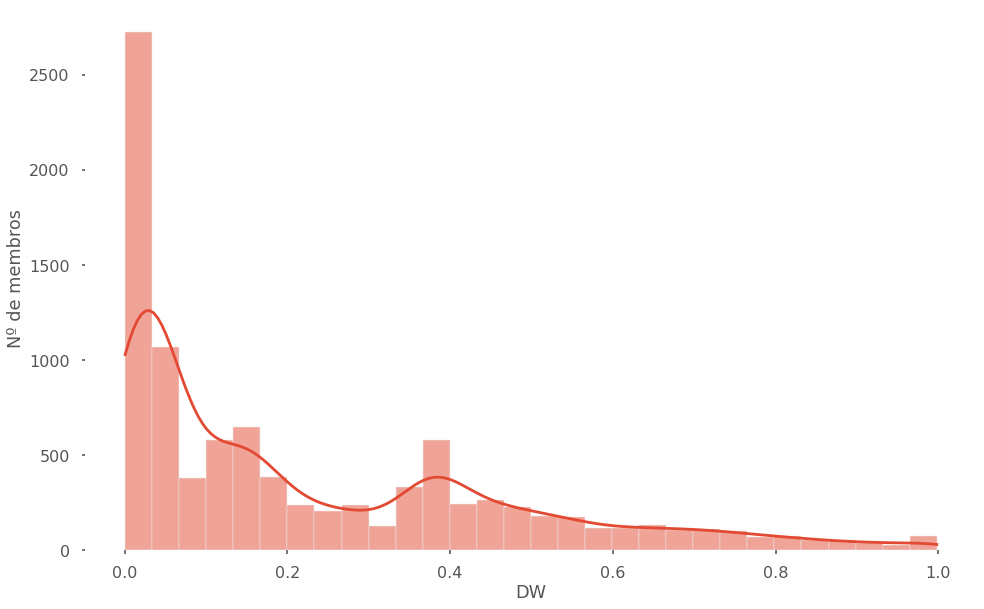

In [17]:
style.use('ggplot')

style.use('seaborn-poster')

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(data=comorbidity_dw, ax = ax, stat = 'count', kde = True, fill = True)

ax.set_ylabel('Nº de membros')
ax.set_xlabel('DW')


ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')

plt.show()

In [18]:
stat_info_df = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/data/external/stat_info_df.csv')

In [19]:
comorbidity_dw_df = pd.DataFrame(comorbidity_dw).merge(stat_info_df, how  = 'left', left_index = True, right_on = 'member_internal_code').reset_index().drop(columns = 'index').set_index('member_internal_code').rename(columns = {0: 'DW'})

In [20]:
comorbidity_dw_df['DW'].describe()

count    9635.000000
mean        0.230046
std         0.240572
min         0.000600
25%         0.028000
50%         0.138202
75%         0.382679
max         0.998053
Name: DW, dtype: float64

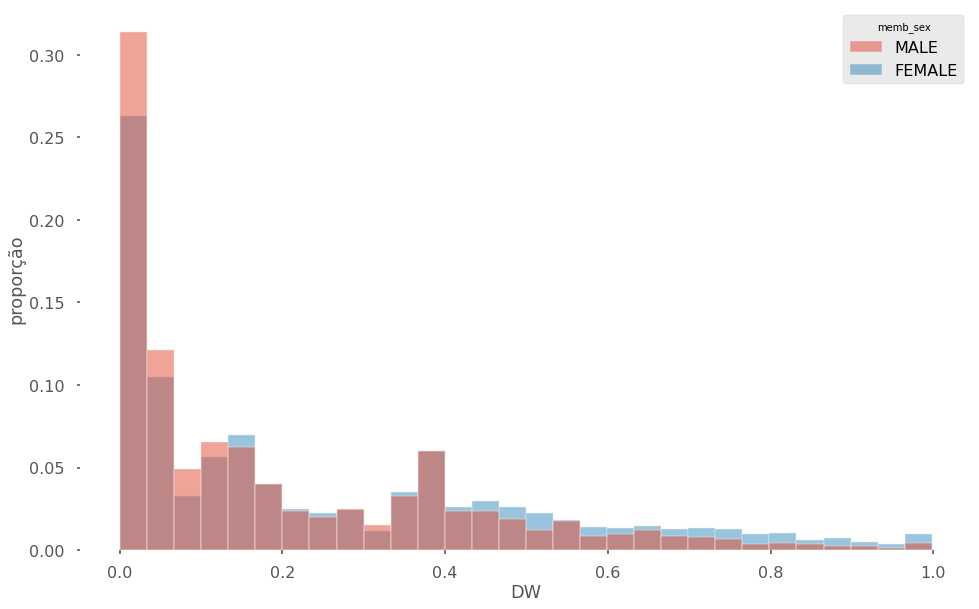

In [88]:
style.use('ggplot')

style.use('seaborn-poster')

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(data=comorbidity_dw_df[comorbidity_dw_df['memb_sex']!='INTERSEX'], x = 'DW',  stat = 'proportion', fill = True, cumulative=False, common_norm = False,  hue = 'memb_sex', element='bars')

ax.set_ylabel('proporção')
ax.set_xlabel('DW')


ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
plt.savefig("dw_hist.png", dpi = 300)

plt.show()

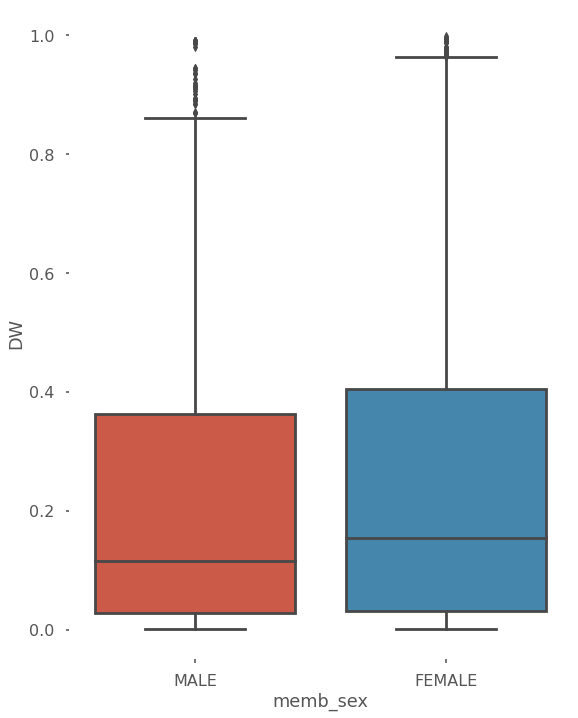

In [89]:
style.use('ggplot')

style.use('seaborn-poster')

fig, ax = plt.subplots(figsize=(9, 12))
sns.boxplot(data=comorbidity_dw_df[comorbidity_dw_df['memb_sex']!='INTERSEX'], y = "DW", x = 'memb_sex', orient = 'vertical')


ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
plt.savefig("box_plot.png", dpi = 190)

plt.show()

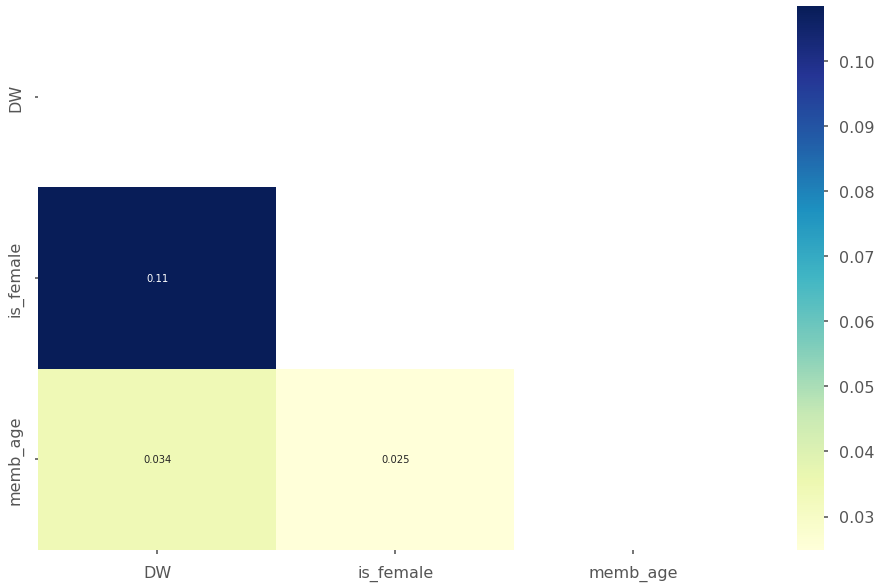

In [87]:
comorbidity_dw_df['is_female'] = np.where(comorbidity_dw_df['memb_sex'] == 'FEMALE', 1,0)
# Generate a mask for the upper triangle
df2 = comorbidity_dw_df[['DW', 'is_female', 'memb_age']]

style.use('ggplot')

style.use('seaborn-poster')

fig, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(df2.corr()))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True, mask=mask, ax = ax)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
plt.savefig("dw_corr.png", dpi = 190)
plt.show()

In [90]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

ModuleNotFoundError: No module named 'plotly'